In [48]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [23]:
# Function to read FASTA file and extract sequences
def read_fasta(file_path):
    with open(file_path, "r") as file:
        data = file.readlines()
    return [line.strip() for line in data if not line.startswith(">")]

In [24]:
# Function to encode DNA sequences into numerical vectors
def encode_sequence(seq):
    mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    return [mapping[nuc] for nuc in seq]

In [25]:
# Load sequences
file_path = "/kaggle/input/dna-sequences/HW4.fas"  # Update with the correct path in Kaggle
dna_sequences = read_fasta(file_path)

# Convert sequences to numerical feature vectors
feature_vectors = np.array([encode_sequence(seq) for seq in dna_sequences])

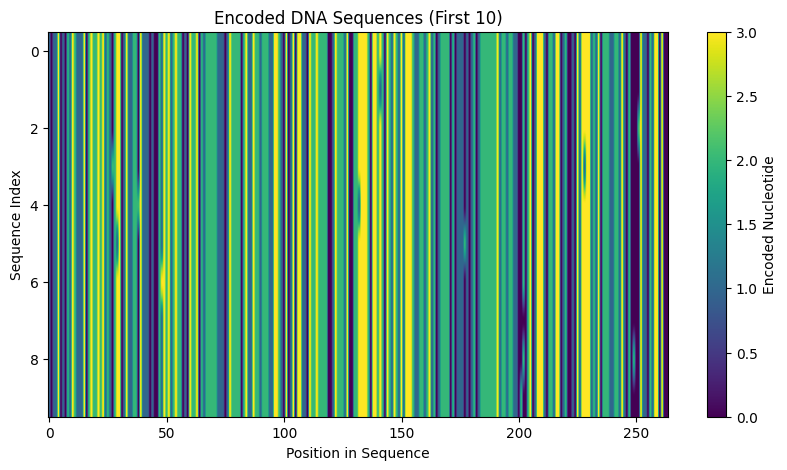

In [47]:
# Visualize the first few encoded sequences
plt.figure(figsize=(10, 5))
plt.imshow(feature_vectors[:10], cmap="viridis", aspect="auto")
plt.colorbar(label="Encoded Nucleotide")
plt.title("Encoded DNA Sequences (First 10)")
plt.xlabel("Position in Sequence")
plt.ylabel("Sequence Index")
plt.show()

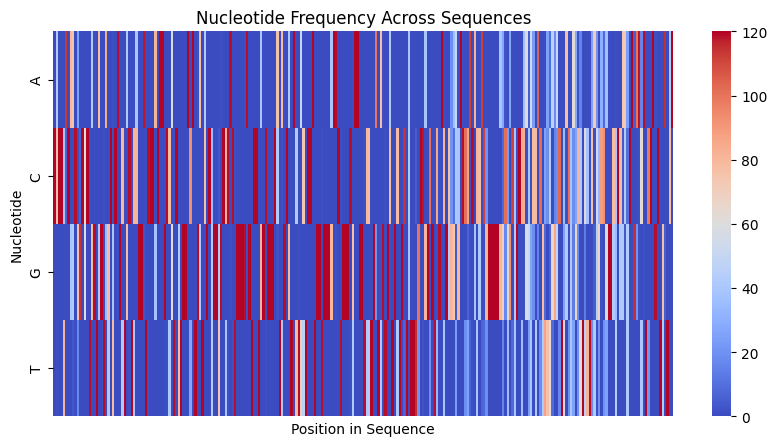

In [49]:
# Nucleotide frequency heatmap
nucleotide_counts = np.apply_along_axis(lambda x: np.bincount(x, minlength=4), axis=0, arr=feature_vectors)
plt.figure(figsize=(10, 5))
sns.heatmap(nucleotide_counts, cmap="coolwarm", xticklabels=False, yticklabels=['A', 'C', 'G', 'T'])
plt.title("Nucleotide Frequency Across Sequences")
plt.xlabel("Position in Sequence")
plt.ylabel("Nucleotide")
plt.show()

In [40]:
# Apply k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(feature_vectors)

In [41]:
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(feature_vectors)

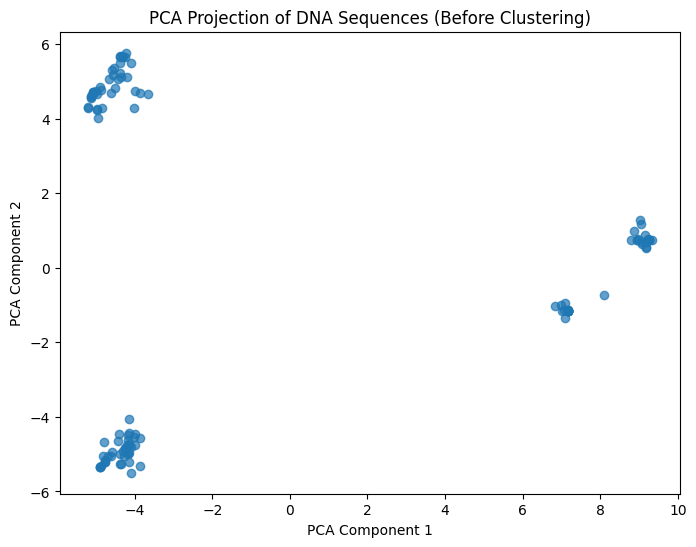

In [44]:
# Scatter plot of PCA components before clustering
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of DNA Sequences (Before Clustering)")
plt.show()

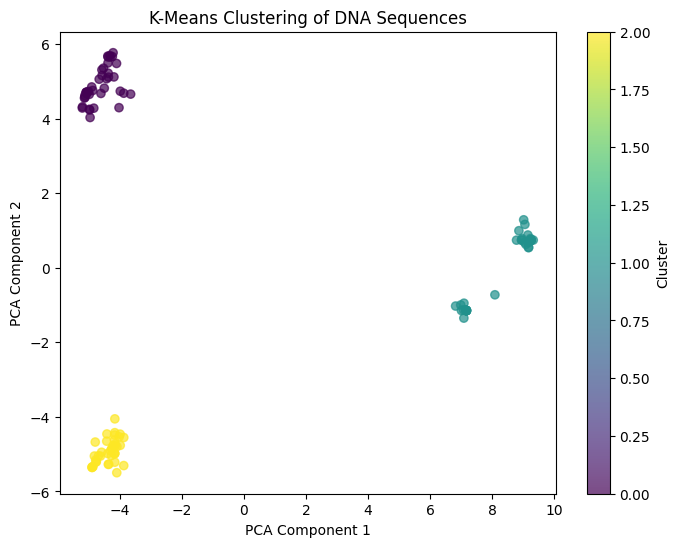

In [45]:
# Plot the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering of DNA Sequences")
plt.colorbar(label="Cluster")
plt.show()